<a href="https://colab.research.google.com/github/mbarbetti/unifi-physics-lab3/blob/main/CL_efficacia_vaccino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calcolo del livello di confidenza per l'efficacia di un vaccino sulla base dei dati riportati in tabella 

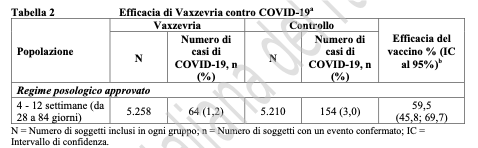

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
!pip install -q iminuit
from iminuit import Minuit
plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
# data from table

nVtot = 5258
nVpos = 64
nCtot = 5210
nCpos = 154

In [3]:
#define negative log likelihood 
#p = probability to be positive for the control sample
#eff = efficacy of vaccine defined such the p*(1-eff) = probability to be positive for the vaccinated sample
#the likelihood is defined as L(p,eff) = binomial(nCpos, nCtot,p)*binomial(nVpos,nVtot,p*(1-eff)) 
#hence the NLL is 

def NLL(p, eff):
    
    nlogL = -binom.logpmf(nCpos, nCtot, p)-binom.logpmf(nVpos, nVtot, p*(1-eff))

    return nlogL

In [30]:
#find minimum of NLL vs p and eff 
#starting points are taken from the table
m = Minuit(NLL, p=0.03, eff=0.595)
m.errordef = Minuit.LIKELIHOOD    # == 0.5 calculate 68.3% (1 sigma) error 
#m.errordef = Minuit.LIKELIHOOD*3.84    # == 0.5*3.84 calculate 95% CL interval 
m.migrad()
m.hesse()
m.minos()
#m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.417                      │              Nfcn = 107              │
│ EDM = 6.68e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │  0.0296   │  0.0023   │  -0.0023   │   0.0024   │         │         │       │
│ 1 │ eff  │   0.59    │   0.06    │   -0.06    │    0.06    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           p           │          eff          │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0023  │  0.0024   │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬───────────────────┐
│     │        p      eff │
├─────┼───────────────────┤
│   p │ 5.51e-06 7.67e-05 │
│ eff │ 7.67e-05  0.00368 │
└─────┴───────────────────┘

In [31]:
### Check results from Minuit and print confidence intervals at 95%
p_fit = m.values['p']
eff_fit = m.values['eff']

p_fit_err = m.errors['p']
eff_fit_err = m.errors['eff']

### Print the results
print(f'Parameters from fit:\n\tp = {p_fit:.3f} +- {p_fit_err:.3f} \n\teff = {eff_fit:.3f} +- {eff_fit_err:.3f}')

Parameters from fit:
	p = 0.030 +- 0.002 
	eff = 0.588 +- 0.061


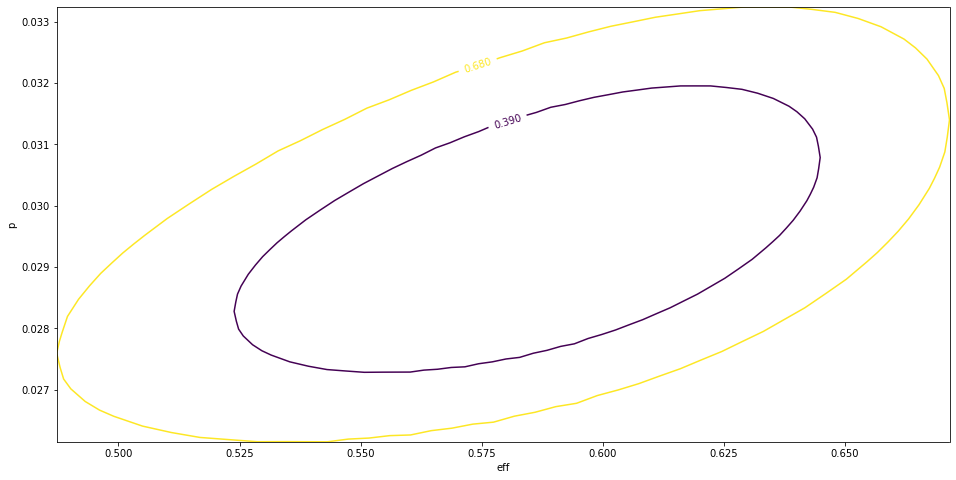

In [32]:
m.draw_mncontour('eff','p', cl=[0.39,0.68])

Parameters from fit: 
	eff = 0.588 + 0.105 -0.135
Interval at 95% CL: [0.453,0.694]


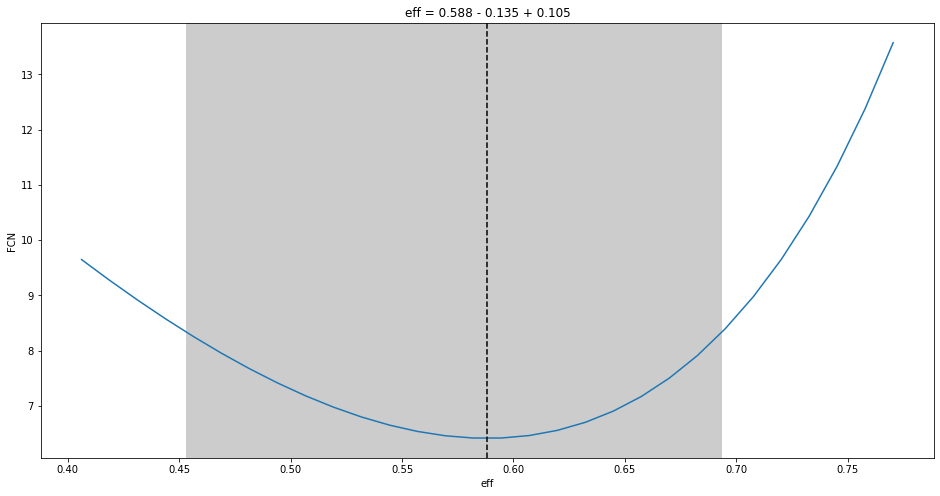

In [39]:
#calculate 95% interval with MINOS and print result
m.minos(cl=0.95)

eff_fit = m.values['eff']

eff_low_err = m.merrors['eff'].lower

eff_up_err = m.merrors['eff'].upper

### Print the results
print(f'Parameters from fit: \n\teff = {eff_fit:.3f} + {eff_up_err:.3f} {eff_low_err:.3f}')
print(f'Interval at 95% CL: [{eff_fit+eff_low_err:.3f},{eff_fit+eff_up_err:.3f}]')

#show NLL profile vs eff 
m.draw_mnprofile('eff',bound=3)
plt.show()